In [54]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
import math as mt

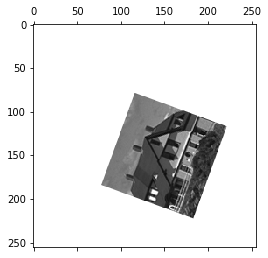

In [55]:
Row_Size_sub = 256;
Column_Size_sub = 256;
Input_raw1 = open('lighthouse1.raw','rb').read()
Input_raw1 = np.frombuffer(Input_raw1,np.uint8)
Input_image1 = Input_raw1[0:Row_Size_sub*Column_Size_sub]
Input_image1 = np.reshape(Input_image1, (Row_Size_sub,Column_Size_sub))
plt.matshow(Input_image1,cmap='gray')

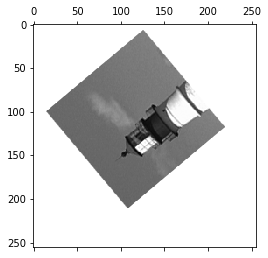

In [56]:
Row_Size_sub = 256;
Column_Size_sub = 256;
Input_raw2 = open('lighthouse2.raw','rb').read()
Input_raw2 = np.frombuffer(Input_raw2,np.uint8)
Input_image2 = Input_raw2[0:Row_Size_sub*Column_Size_sub]
Input_image2 = np.reshape(Input_image2, (Row_Size_sub,Column_Size_sub))
plt.matshow(Input_image2,cmap='gray')

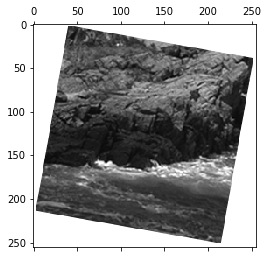

In [57]:
Row_Size_sub = 256;
Column_Size_sub = 256;
Input_raw3 = open('lighthouse3.raw','rb').read()
Input_raw3 = np.frombuffer(Input_raw3,np.uint8)
Input_image3 = Input_raw3[0:Row_Size_sub*Column_Size_sub]
Input_image3 = np.reshape(Input_image3, (Row_Size_sub,Column_Size_sub))
plt.matshow(Input_image3,cmap='gray')

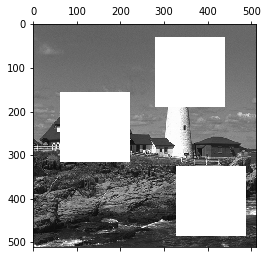

In [58]:
Row_Size_main = 512;
Column_Size_main = 512;
Input_raw = open('lighthouse.raw','rb').read()
Input_raw = np.frombuffer(Input_raw,np.uint8)
Input_image = Input_raw[0:Row_Size_main*Column_Size_main]
Input_image = np.reshape(Input_image, (Row_Size_main,Column_Size_main))
plt.matshow(Input_image,cmap='gray')

In [59]:
#Finding the corners
flag = 0;
for i in range (0,255):
    for j in range (0,255):
        if(Input_image1[i][j] < 255):
            flag = 1;
            righttop_corner_x = i;
            righttop_corner_y = j;
            break;
        if(flag == 1):
            break;
flag = 0;
for j in range (0,255):
    for i in range (255,0,-1):
        if(Input_image1[i][j] < 255):
            flag = 1;
            lefttop_corner_x = i;
            lefttop_corner_y = j;
            break;
        if(flag == 1):
            break;
flag = 0;
for i in range (255,0,-1):
    for j in range (255,0,-1):
        if(Input_image1[i][j] < 255):
            flag = 1;
            leftbottom_corner_x = i;
            leftbottom_corner_y = j;
            break;
        if(flag == 1):
            break;
flag = 0;
for j in range (255,0,-1):
    for i in range (0,255):
        if(Input_image1[i][j] < 255):
            flag = 1;
            rightbottom_corner_x = i;
            rightbottom_corner_y = j;
            break;
        if(flag == 1):
            break;
print(righttop_corner_x)
print(righttop_corner_y)
print(lefttop_corner_x)
print(lefttop_corner_y) 
print(leftbottom_corner_x)
print(leftbottom_corner_y)
print(rightbottom_corner_x)
print(rightbottom_corner_y)

80
115
185
78
223
183
118
221


In [60]:
#Converting them to Cartesian
x1_rtc = righttop_corner_y + 0.5;
y1_rtc = 256 - righttop_corner_x - 0.5;
x3_ltc = lefttop_corner_y + 0.5;
y3_ltc = 256 - lefttop_corner_x - 0.5;
x2_lbc = leftbottom_corner_y + 0.5;
y2_lbc = 256 - leftbottom_corner_x - 0.5;
x4_rbc = rightbottom_corner_y + 0.5;
y4_rbc = 256 - rightbottom_corner_x - 0.5;
print(x1_rtc)
print(y1_rtc)
print(x3_ltc)
print(y3_ltc)
print(x2_lbc)
print(y2_lbc)
print(x4_rbc)
print(y4_rbc)

115.5
175.5
78.5
70.5
183.5
32.5
221.5
137.5


In [61]:
#Calculating the width, height, theta, center point
width = mt.sqrt( ( x3_ltc - x1_rtc )**2 + ( y3_ltc - y1_rtc )**2 );
height = mt.sqrt( ( x1_rtc - x4_rbc )**2 + ( y1_rtc - y4_rbc )**2 );
theta = np.arctan( ( y2_lbc - y3_ltc)/( x2_lbc - x3_ltc));
Xc = ( ( x3_ltc + x4_rbc )/2);
Yc = ( ( y3_ltc + y4_rbc )/2);
print(width)
print(height)
print(theta)
print(Xc)
print(Yc)

111.32834320154055
112.60550608207397
-0.3472407828961109
150.0
104.0


In [115]:
Out_image12 = np.zeros( (160, 160) ) 
for i in range(0,160):
    for j in range(0,160):
#Converting it to cartesian
        x = j + 0.5;
        y = 160 - i - 0.5;
#Translation1 matrix
        T1 = np.array([[1,0,-Xc],
                      [0,1,-Yc],
                      [0,0,1]]);
        T1inv = inv(T1);
#Rotation matrix
        R = np.array([[np.cos((-np.pi/2)-theta), -np.sin((-np.pi/2)-theta), 0],
                      [np.sin((-np.pi/2)-theta),  np.cos((-np.pi/2)-theta), 0],
                      [0         ,  0         ,1]]);
        Rinv = inv(R);
#Scaling matrix
        Sx = 160/height;
        Sy = 160/width;
        S = np.array([[Sx, 0, 0],
                      [0,  Sy,0],
                      [0,  0, 1]]);
        Sinv = inv(S);
#Translational 2 matrix 
        Xc2 = 160/2;
        Yc2 = 160/2;
        T2 = np.array([[1,0,Xc2],
                       [0,1,Yc2],
                       [0,0,1]]);
        T2inv = inv(T2);
#XY matrix
        XY = np.array([[x],
                       [y],
                       [1]]);
        UV_inter1 = np.matmul(T2inv,XY);
        UV_inter2 = np.matmul(Sinv,UV_inter1);
        UV_inter3 = np.matmul(Rinv,UV_inter2);
        UV_final = np.matmul(T1inv,UV_inter3);
        u = UV_final[0];
        v = UV_final[1];
        udash = 256 - v - 0.5;#p'
        vdash = u - 0.5;#q'
#Bilinear Interpolation
        uceil = mt.ceil(udash);#p+1
        vceil = mt.ceil(vdash);#q+1
        ufloor = mt.floor(udash);#p
        vfloor = mt.floor(vdash);#q
        a = udash - ufloor; 
        b = vdash - vfloor;
        Out_image12[i][j] = (1-a)*[(1-b)*Input_image1[ufloor][vfloor] + (b*Input_image1[ufloor][vceil])] + a*[(1-b)*Input_image1[uceil][vfloor] + (b*Input_image1[uceil][vceil])];

In [116]:
Out_image11 = np.zeros( (160, 160) ) 
for i in range(0,160):
    for j in range(0,160):
#Converting it to cartesian
        x = j + 0.5;
        y = 160 - i - 0.5;
#Translation1 matrix
        T1 = np.array([[1,0,-Xc],
                      [0,1,-Yc],
                      [0,0,1]]);
        T1inv = inv(T1);
#Rotation matrix
        R = np.array([[np.cos((-np.pi/2)-theta), -np.sin((-np.pi/2)-theta), 0],
                      [np.sin((-np.pi/2)-theta),  np.cos((-np.pi/2)-theta), 0],
                      [0         ,  0         ,1]]);
        Rinv = inv(R);
#Scaling matrix
        Sx = 160/height;
        Sy = 160/width;
        S = np.array([[Sx, 0, 0],
                      [0,  Sy,0],
                      [0,  0, 1]]);
        Sinv = inv(S);
#Translational 2 matrix 
        Xc2 = 160/2;
        Yc2 = 160/2;
        T2 = np.array([[1,0,Xc2],
                       [0,1,Yc2],
                       [0,0,1]]);
        T2inv = inv(T2);
#XY matrix
        XY = np.array([[x],
                       [y],
                       [1]]);
        UV_inter1 = np.matmul(T2inv,XY);
        UV_inter2 = np.matmul(Sinv,UV_inter1);
        UV_inter3 = np.matmul(Rinv,UV_inter2);
        UV_final = np.matmul(T1inv,UV_inter3);
        u = UV_final[0];
        v = UV_final[1];
        udash = int(256 - v - 0.5);#p'
        vdash = int(u - 0.5);#q'
        Out_image11[i][j] = Input_image1[udash][vdash];

In [286]:
Out_image11 = np.zeros( (160, 160) ) 
for i in range(0,160):
    for j in range(0,160):
#Converting it to cartesian
        x = j + 0.5;
        y = 160 - i - 0.5;
#Translation1 matrix
        T1 = np.array([[1,0,-Xc],
                      [0,1,-Yc],
                      [0,0,1]]);
        T1inv = inv(T1);
#Rotation matrix
        R = np.array([[np.cos((-np.pi/2)-theta), -np.sin((-np.pi/2)-theta), 0],
                      [np.sin((-np.pi/2)-theta),  np.cos((-np.pi/2)-theta), 0],
                      [0         ,  0         ,1]]);
        Rinv = inv(R);
#Scaling matrix
        Sx = 160/height;
        Sy = 160/width;
        S = np.array([[Sx, 0, 0],
                      [0,  Sy,0],
                      [0,  0, 1]]);
        Sinv = inv(S);
#Translational 2 matrix 
        Xc2 = 160/2;
        Yc2 = 160/2;
        T2 = np.array([[1,0,Xc2],
                       [0,1,Yc2],
                       [0,0,1]]);
        T2inv = inv(T2);
#XY matrix
        XY = np.array([[x],
                       [y],
                       [1]]);
        UV_inter1 = np.matmul(T2inv,XY);
        UV_inter2 = np.matmul(Sinv,UV_inter1);
        UV_inter3 = np.matmul(Rinv,UV_inter2);
        UV_final = np.matmul(T1inv,UV_inter3);
        u = UV_final[0];
        v = UV_final[1];
        udash = int(256 - v - 0.5);#p'
        vdash = int(u - 0.5);#q'
        if(i == 0):
            Out_image11[i][j] = Input_image1[i+1][j];
        elif(j == 0):
            Out_image11[i][j] = Input_image1[i][j+1];
        elif(i == 159):
            Out_image11[i][j] = Input_image1[i-1][j];
        elif(j == 159):
            Out_image11[i][j] = Input_image1[i][j-1];
        else:
            Out_image11[i][j] = Input_image1[udash][vdash];

In [415]:
Out_image12 = np.zeros( (160, 160) ) 
for i in range(0,160):
    for j in range(0,160):
#Converting it to cartesian
        x = j + 0.5;
        y = 160 - i - 0.5;
#Translation1 matrix
        T1 = np.array([[1,0,-Xc],
                      [0,1,-Yc],
                      [0,0,1]]);
        T1inv = inv(T1);
#Rotation matrix
        R = np.array([[np.cos((-np.pi/2)-theta), -np.sin((-np.pi/2)-theta), 0],
                      [np.sin((-np.pi/2)-theta),  np.cos((-np.pi/2)-theta), 0],
                      [0         ,  0         ,1]]);
        Rinv = inv(R);
#Scaling matrix
        Sx = 160/height+ 0.027;
        Sy = 160/width+0.027;
        S = np.array([[Sx, 0, 0],
                      [0,  Sy,0],
                      [0,  0, 1]]);
        Sinv = inv(S);
#Translational 2 matrix 
        Xc2 = 160/2;
        Yc2 = 160/2;
        T2 = np.array([[1,0,Xc2],
                       [0,1,Yc2],
                       [0,0,1]]);
        T2inv = inv(T2);
#XY matrix
        XY = np.array([[x],
                       [y],
                       [1]]);
        UV_inter1 = np.matmul(T2inv,XY);
        UV_inter2 = np.matmul(Sinv,UV_inter1);
        UV_inter3 = np.matmul(Rinv,UV_inter2);
        UV_final = np.matmul(T1inv,UV_inter3);
        u = UV_final[0];
        v = UV_final[1];
        udash = 256 - v - 0.5;#p'
        vdash = u - 0.5;#q'
#Bilinear Interpolation
        uceil = mt.ceil(udash);#p+1
        vceil = mt.ceil(vdash);#q+1
        ufloor = mt.floor(udash);#p
        vfloor = mt.floor(vdash);#q
        a = udash - ufloor; 
        b = vdash - vfloor;
        Out_image12[i][j] = (1-a)*[(1-b)*Input_image1[ufloor][vfloor] + (b*Input_image1[ufloor][vceil])] + a*[(1-b)*Input_image1[uceil][vfloor] + (b*Input_image1[uceil][vceil])];

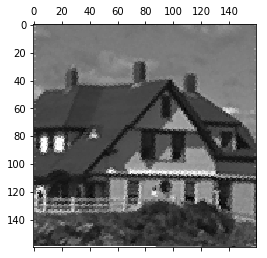

In [399]:
plt.matshow(Out_image11,cmap='gray')

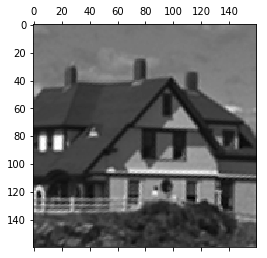

In [367]:
plt.matshow(Out_image12,cmap='gray')

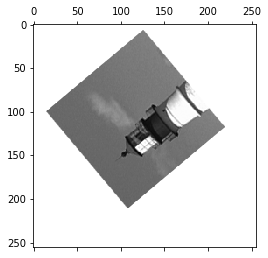

In [368]:
Row_Size_sub = 256;
Column_Size_sub = 256;
Input_raw2 = open('lighthouse2.raw','rb').read()
Input_raw2 = np.frombuffer(Input_raw2,np.uint8)
Input_image2 = Input_raw2[0:Row_Size_sub*Column_Size_sub]
Input_image2 = np.reshape(Input_image2, (Row_Size_sub,Column_Size_sub))
plt.matshow(Input_image2,cmap='gray')

In [369]:
#Finding the corners
flag = 0;
for i in range (0,255):
    for j in range (0,255):
        if(Input_image2[i][j] < 255):
            flag = 1;
            rightbottom_corner_x2 = i;
            rightbottom_corner_y2 = j;
            break;
        if(flag == 1):
            break;
flag = 0;
for j in range (0,255):
    for i in range (255,0,-1):
        if(Input_image2[i][j] < 255):
            flag = 1;
            righttop_corner_x2 = i;
            righttop_corner_y2 = j;
            break;
        if(flag == 1):
            break;
flag = 0;
for i in range (255,0,-1):
    for j in range (255,0,-1):
        if(Input_image2[i][j] < 255):
            flag = 1;
            lefttop_corner_x2 = i;
            lefttop_corner_y2 = j;
            break;
        if(flag == 1):
            break;
flag = 0;
for j in range (255,0,-1):
    for i in range (0,255):
        if(Input_image2[i][j] < 255):
            flag = 1;
            leftbottom_corner_x2 = i;
            leftbottom_corner_y2 = j;
            break;
        if(flag == 1):
            break;
print(righttop_corner_x2)
print(righttop_corner_y2)
print(lefttop_corner_x2)
print(lefttop_corner_y2) 
print(leftbottom_corner_x2)
print(leftbottom_corner_y2)
print(rightbottom_corner_x2)
print(rightbottom_corner_y2)

102
15
212
108
116
218
8
125


In [370]:
#Converting them to Cartesian
x1_rtc2 = righttop_corner_y2 + 0.5;
y1_rtc2 = 256 - righttop_corner_x2 - 0.5;
x3_ltc2 = lefttop_corner_y2 + 0.5;
y3_ltc2 = 256 - lefttop_corner_x2 - 0.5;
x2_lbc2 = leftbottom_corner_y2 + 0.5;
y2_lbc2 = 256 - leftbottom_corner_x2 - 0.5;
x4_rbc2 = rightbottom_corner_y2 + 0.5;
y4_rbc2 = 256 - rightbottom_corner_x2 - 0.5;
print(x1_rtc2)
print(y1_rtc2)
print(x3_ltc2)
print(y3_ltc2)
print(x2_lbc2)
print(y2_lbc2)
print(x4_rbc2)
print(y4_rbc2)

15.5
153.5
108.5
43.5
218.5
139.5
125.5
247.5


In [371]:
#Calculating the width, height, theta, center point
width2 = mt.sqrt( ( x1_rtc2 - x3_ltc2 )**2 + ( y1_rtc2 - y3_ltc2 )**2 );
height2 = mt.sqrt( ( x1_rtc2 - x4_rbc2 )**2 + ( y1_rtc2 - y4_rbc2 )**2 );
theta2 = np.arctan( ( y2_lbc2 - y3_ltc2)/( x2_lbc2 - x3_ltc2));
Xctwo = ( ( x3_ltc2 + x4_rbc2 )/2);
Yctwo = ( ( y3_ltc2 + y4_rbc2 )/2);
print(width2)
print(height2)
print(theta2)
print(Xctwo)
print(Yctwo)

144.04513181638595
144.69277798148738
0.7175413405411444
117.0
145.5


In [413]:
Out_image2 = np.zeros( (160, 160) ) 
for i in range(0,160):
    for j in range(0,160):
#Converting it to cartesian
        x = j + 0.5;
        y = 160 - i - 0.5;
#Translation1 matrix
        T1 = np.array([[1,0,-Xctwo],
                      [0,1,-Yctwo],
                      [0,0,1]]);
        T1inv = inv(T1);
#Rotation matrix
        R = np.array([[np.cos((-np.pi/2)-theta2), -np.sin((-np.pi/2)-theta2), 0],
                      [np.sin((-np.pi/2)-theta2),  np.cos((-np.pi/2)-theta2), 0],
                      [0         ,  0         ,1]]);
        Rinv = inv(R);
#Scaling matrix
        Sx = 160/height2;
        Sy = 160/width2;
        S = np.array([[Sx, 0, 0],
                      [0,  Sy,0],
                      [0,  0, 1]]);
        Sinv = inv(S);
#Translational 2 matrix 
        Xctwo2 = 160/2;
        Yctwo2 = 160/2;
        T2 = np.array([[1,0,Xctwo2],
                       [0,1,Yctwo2],
                       [0,0,1]]);
        T2inv = inv(T2);
#XY matrix
        XY = np.array([[x],
                       [y],
                       [1]]);
        UV_inter1 = np.matmul(T2inv,XY);
        UV_inter2 = np.matmul(Sinv,UV_inter1);
        UV_inter3 = np.matmul(Rinv,UV_inter2);
        UV_final = np.matmul(T1inv,UV_inter3);
        u = UV_final[0];
        v = UV_final[1];
        udash = 256 - v - 0.5;#p'
        vdash = u - 0.5;#q'
#Bilinear Interpolation
        uceil = mt.ceil(udash);#p+1
        vceil = mt.ceil(vdash);#q+1
        ufloor = mt.floor(udash);#p
        vfloor = mt.floor(vdash);#q
        a = udash - ufloor; 
        b = vdash - vfloor;
        Out_image2[i][j] = (1-a)*[(1-b)*Input_image2[ufloor][vfloor] + (b*Input_image2[ufloor][vceil])] + a*[(1-b)*Input_image2[uceil][vfloor] + (b*Input_image2[uceil][vceil])];

In [401]:
Out_image2 = np.zeros( (160, 160) ) 
for i in range(0,160):
    for j in range(0,160):
#Converting it to cartesian
        x = j + 0.5;
        y = 160 - i - 0.5;
#Translation1 matrix
        T1 = np.array([[1,0,-Xctwo],
                      [0,1,-Yctwo],
                      [0,0,1]]);
        T1inv = inv(T1);
#Rotation matrix
        R = np.array([[np.cos((-np.pi/2)-theta2+0.0178), -np.sin((-np.pi/2)-theta2+0.0178), 0],
                      [np.sin((-np.pi/2)-theta2+0.0178),  np.cos((-np.pi/2)-theta2+0.0178), 0],
                      [0         ,  0         ,1]]);
        Rinv = inv(R);
#Scaling matrix
        Sx = 160/height2;
        Sy = 160/width2;
        S = np.array([[Sx, 0, 0],
                      [0,  Sy,0],
                      [0,  0, 1]]);
        Sinv = inv(S);
#Translational 2 matrix 
        Xctwo2 = 160/2;
        Yctwo2 = 160/2;
        T2 = np.array([[1,0,Xctwo2],
                       [0,1,Yctwo2],
                       [0,0,1]]);
        T2inv = inv(T2);
#XY matrix
        XY = np.array([[x],
                       [y],
                       [1]]);
        UV_inter1 = np.matmul(T2inv,XY);
        UV_inter2 = np.matmul(Sinv,UV_inter1);
        UV_inter3 = np.matmul(Rinv,UV_inter2);
        UV_final = np.matmul(T1inv,UV_inter3);
        u = UV_final[0];
        v = UV_final[1];
        udash = int(256 - v - 0.5);#p'
        vdash = int(u - 0.5);#q'
        Out_image2[i][j] = Input_image2[udash][vdash];
        

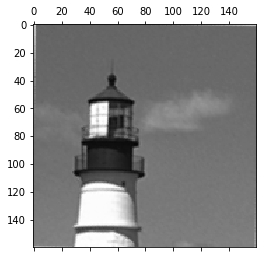

In [414]:
plt.matshow(Out_image2,cmap='gray')

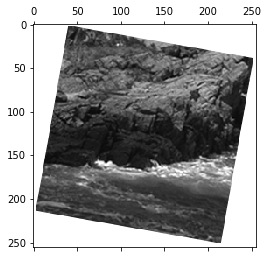

In [374]:
Row_Size_sub = 256;
Column_Size_sub = 256;
Input_raw3 = open('lighthouse3.raw','rb').read()
Input_raw3 = np.frombuffer(Input_raw3,np.uint8)
Input_image3 = Input_raw3[0:Row_Size_sub*Column_Size_sub]
Input_image3 = np.reshape(Input_image3, (Row_Size_sub,Column_Size_sub))
plt.matshow(Input_image3,cmap='gray')

In [375]:
#Finding the corners
flag = 0;
for i in range (0,255):
    for j in range (0,255):
        if(Input_image3[i][j] < 255):
            flag = 1;
            lefttop_corner_x3 = i;
            lefttop_corner_y3 = j;
            break;
        if(flag == 1):
            break;
flag = 0;
for j in range (0,255):
    for i in range (255,0,-1):
        if(Input_image3[i][j] < 255):
            flag = 1;
            leftbottom_corner_x3 = i;
            leftbottom_corner_y3 = j;
            break;
        if(flag == 1):
            break;
flag = 0;
for i in range (255,0,-1):
    for j in range (255,0,-1):
        if(Input_image3[i][j] < 255):
            flag = 1;
            rightbottom_corner_x3 = i;
            rightbottom_corner_y3 = j;
            break;
        if(flag == 1):
            break;
flag = 0;
for j in range (255,0,-1):
    for i in range (0,255):
        if(Input_image3[i][j] < 255):
            flag = 1;
            righttop_corner_x3 = i;
            righttop_corner_y3 = j;
            break;
        if(flag == 1):
            break;
print(righttop_corner_x3)
print(righttop_corner_y3)
print(lefttop_corner_x3)
print(lefttop_corner_y3) 
print(leftbottom_corner_x3)
print(leftbottom_corner_y3)
print(rightbottom_corner_x3)
print(rightbottom_corner_y3)

40
251
3
40
214
3
251
214


In [376]:
#Converting them to Cartesian
x1_rtc3 = righttop_corner_y3 + 0.5;
y1_rtc3 = 256 - righttop_corner_x3 - 0.5;
x3_ltc3 = lefttop_corner_y3 + 0.5;
y3_ltc3 = 256 - lefttop_corner_x3 - 0.5;
x2_lbc3 = leftbottom_corner_y3 + 0.5;
y2_lbc3 = 256 - leftbottom_corner_x3 - 0.5;
x4_rbc3 = rightbottom_corner_y3 + 0.5;
y4_rbc3 = 256 - rightbottom_corner_x3 - 0.5;
print(x1_rtc3)
print(y1_rtc3)
print(x3_ltc3)
print(y3_ltc3)
print(x2_lbc3)
print(y2_lbc3)
print(x4_rbc3)
print(y4_rbc3)

251.5
215.5
40.5
252.5
3.5
41.5
214.5
4.5


In [377]:
#Calculating the width, height, theta, center point
width3 = mt.sqrt( ( x1_rtc3 - x3_ltc3 )**2 + ( y1_rtc3 - y3_ltc3 )**2 );
height3 = mt.sqrt( ( x1_rtc3 - x4_rbc3 )**2 + ( y1_rtc3 - y4_rbc3 )**2 );
theta3 = np.arctan( ( y2_lbc3 - y3_ltc3)/( x2_lbc3 - x3_ltc3));
Xcthree = ( ( x3_ltc3 + x4_rbc3 )/2);
Ycthree = ( ( y3_ltc3 + y4_rbc3 )/2);
print(width3)
print(height3)
print(theta3)
print(Xcthree)
print(Ycthree)

214.21951358361358
214.21951358361358
1.3972057931300859
127.5
128.5


In [411]:
Out_image31 = np.zeros( (160, 160) ) 
for i in range(0,160):
    for j in range(0,160):
#Converting it to cartesian
        x = j + 0.5;
        y = 160 - i - 0.5;
#Translation1 matrix
        T1 = np.array([[1,0,-Xcthree],
                      [0,1,-Ycthree],
                      [0,0,1]]);
        T1inv = inv(T1);
#Rotation matrix
        R = np.array([[np.cos((np.pi/2)-theta3), -np.sin((np.pi/2)-theta3), 0],
                      [np.sin((np.pi/2)-theta3),  np.cos((np.pi/2)-theta3), 0],
                      [0         ,  0         ,1]]);
        Rinv = inv(R);
#Scaling matrix
        Sx = 160/height3;
        Sy = 160/width3;
        S = np.array([[Sx, 0, 0],
                      [0,  Sy,0],
                      [0,  0, 1]]);
        Sinv = inv(S);
#Translational 2 matrix 
        Xcthree2 = 160/2;
        Ycthree2 = 160/2;
        T2 = np.array([[1,0,Xcthree2],
                       [0,1,Ycthree2],
                       [0,0,1]]);
        T2inv = inv(T2);
#XY matrix
        XY = np.array([[x],
                       [y],
                       [1]]);
        UV_inter1 = np.matmul(T2inv,XY);
        UV_inter2 = np.matmul(Sinv,UV_inter1);
        UV_inter3 = np.matmul(Rinv,UV_inter2);
        UV_final = np.matmul(T1inv,UV_inter3);
        u = UV_final[0];
        v = UV_final[1];
        udash = 256 - v - 0.5;#p'
        vdash = u - 0.5;#q'
#Bilinear Interpolation
        uceil = mt.ceil(udash);#p+1
        vceil = mt.ceil(vdash);#q+1
        ufloor = mt.floor(udash);#p
        vfloor = mt.floor(vdash);#q
        a = udash - ufloor; 
        b = vdash - vfloor;
        Out_image31[i][j] = (1-a)*[(1-b)*Input_image3[ufloor][vfloor] + (b*Input_image3[ufloor][vceil])] + a*[(1-b)*Input_image3[uceil][vfloor] + (b*Input_image3[uceil][vceil])];

In [405]:
Out_image3 = np.zeros( (160, 160) ) 
for i in range(0,160):
    for j in range(0,160):
#Converting it to cartesian
        x = j + 0.5;
        y = 160 - i - 0.5;
#Translation1 matrix
        T1 = np.array([[1,0,-Xcthree],
                      [0,1,-Ycthree],
                      [0,0,1]]);
        T1inv = inv(T1);
#Rotation matrix
        R = np.array([[np.cos((np.pi/2)-theta3), -np.sin((np.pi/2)-theta3), 0],
                      [np.sin((np.pi/2)-theta3),  np.cos((np.pi/2)-theta3), 0],
                      [0         ,  0         ,1]]);
        Rinv = inv(R);
#Scaling matrix
        Sx = 160/height3;
        Sy = 160/width3;
        S = np.array([[Sx, 0, 0],
                      [0,  Sy,0],
                      [0,  0, 1]]);
        Sinv = inv(S);
#Translational 2 matrix 
        Xcthree2 = 160/2;
        Ycthree2 = 160/2;
        T2 = np.array([[1,0,Xcthree2],
                       [0,1,Ycthree2],
                       [0,0,1]]);
        T2inv = inv(T2);
#XY matrix
        XY = np.array([[x],
                       [y],
                       [1]]);
        UV_inter1 = np.matmul(T2inv,XY);
        UV_inter2 = np.matmul(Sinv,UV_inter1);
        UV_inter3 = np.matmul(Rinv,UV_inter2);
        UV_final = np.matmul(T1inv,UV_inter3);
        u = UV_final[0];
        v = UV_final[1];
        udash = int(256 - v - 0.5);#p'
        vdash = int(u - 0.5);#q'
        Out_image3[i][j] = Input_image3[udash][vdash];


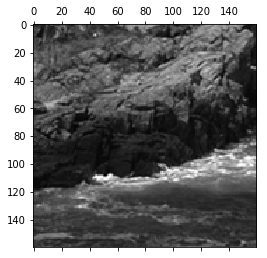

In [412]:
plt.matshow(Out_image31,cmap='gray')

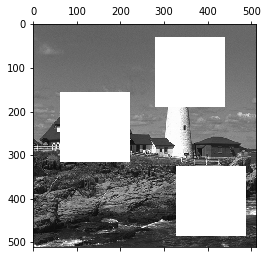

In [380]:
Row_Size_main = 512;
Column_Size_main = 512;
Input_raw = open('lighthouse.raw','rb').read()
Input_raw = np.frombuffer(Input_raw,np.uint8)
Input_image = Input_raw[0:Row_Size_main*Column_Size_main]
Input_image = np.reshape(Input_image, (Row_Size_main,Column_Size_main))
plt.matshow(Input_image,cmap='gray')

In [381]:
#Binarising the main image
Bin_image = np.zeros( (512, 512) ) 
for i  in range(0,512):
    for j in range(0,512):
        if(Input_image[i][j] < 255):
            Bin_image[i][j] = 0;
        else:
            Bin_image[i][j] = 255;

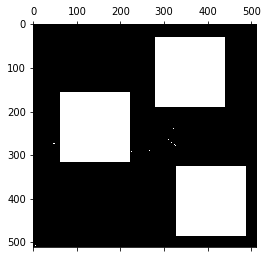

In [382]:
plt.matshow(Bin_image,cmap='gray')

In [383]:
#Fitting second image
pixel2_yall = [];
for i in range (0,512):
    count = 0;
    for j in range (0,512):
        if(Bin_image[i][j] == 255):
            pixel2_yall.append(j);
            count = count+1
    if (count == 160):
        pixel2_x = i;
        break;
    
pixel2_y = pixel2_yall[0];  

In [384]:
pixel2_y

278

In [385]:
pixel2_x

31

In [386]:
Fitted_2 = np.zeros( (512, 512) ) 
for i in range (0,512):
    for j in range (0,512):
        Fitted_2[i][j] = Input_image[i][j];
m =0;
for i in range(pixel2_x,pixel2_x+160):
    n = 0;
    for j in range(pixel2_y,pixel2_y+160):
        Fitted_2[i][j] = Out_image2[m][n];
        n += 1;
    m += 1;
        

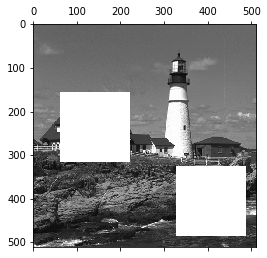

In [387]:
plt.matshow(Fitted_2,cmap='gray')

In [388]:
#Fitting third image

for i in range (511,0,-1):
    count1 = 0;
    pixel3_yall = [];
    for j in range (511,0,-1):
        if(Bin_image[i][j] == 255):
            pixel3_yall.append(j);
            count1 = count1+1;
    if (count1 == 160):
        pixel3_x = i;
        break;
    
pixel3_y = pixel3_yall[0];

In [389]:
pixel3_yall

[485,
 484,
 483,
 482,
 481,
 480,
 479,
 478,
 477,
 476,
 475,
 474,
 473,
 472,
 471,
 470,
 469,
 468,
 467,
 466,
 465,
 464,
 463,
 462,
 461,
 460,
 459,
 458,
 457,
 456,
 455,
 454,
 453,
 452,
 451,
 450,
 449,
 448,
 447,
 446,
 445,
 444,
 443,
 442,
 441,
 440,
 439,
 438,
 437,
 436,
 435,
 434,
 433,
 432,
 431,
 430,
 429,
 428,
 427,
 426,
 425,
 424,
 423,
 422,
 421,
 420,
 419,
 418,
 417,
 416,
 415,
 414,
 413,
 412,
 411,
 410,
 409,
 408,
 407,
 406,
 405,
 404,
 403,
 402,
 401,
 400,
 399,
 398,
 397,
 396,
 395,
 394,
 393,
 392,
 391,
 390,
 389,
 388,
 387,
 386,
 385,
 384,
 383,
 382,
 381,
 380,
 379,
 378,
 377,
 376,
 375,
 374,
 373,
 372,
 371,
 370,
 369,
 368,
 367,
 366,
 365,
 364,
 363,
 362,
 361,
 360,
 359,
 358,
 357,
 356,
 355,
 354,
 353,
 352,
 351,
 350,
 349,
 348,
 347,
 346,
 345,
 344,
 343,
 342,
 341,
 340,
 339,
 338,
 337,
 336,
 335,
 334,
 333,
 332,
 331,
 330,
 329,
 328,
 327,
 326]

In [390]:
pixel3_x

487

In [391]:
Fitted_23 = np.zeros( (512, 512) ) 
for i in range (0,512):
    for j in range (0,512):
        Fitted_23[i][j] = Fitted_2[i][j];
m =159;
for i in range(pixel3_x,pixel3_x-160,-1):
    n = 159;
    for j in range(pixel3_y,pixel3_y-160,-1):
        Fitted_23[i][j] = Out_image3[m][n];
        n -= 1;
    m -= 1;

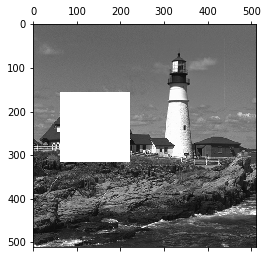

In [392]:
plt.matshow(Fitted_23,cmap='gray')

In [393]:
#Fitting second image

for i in range (0,511):
    count1 = 0;
    pixel2_yall = [];
    for j in range (0,511):
        if(Fitted_23[i][j] == 255):
            pixel2_yall.append(j);
            count1 = count1+1;
    if (count1 == 160):
        pixel2_x = i;
        break;
    
pixel2_y = pixel2_yall[0];

In [394]:
pixel2_y

62

In [395]:
pixel2_x

157

In [416]:
Fitted_231 = np.zeros( (512, 512) ) 
for i in range (0,512):
    for j in range (0,512):
        Fitted_231[i][j] = Fitted_23[i][j];
m =0;
for i in range(pixel2_x,pixel2_x+160):
    n = 0;
    for j in range(pixel2_y,pixel2_y+160):
        Fitted_231[i][j] = Out_image12[m][n];
        n += 1;
    m += 1;

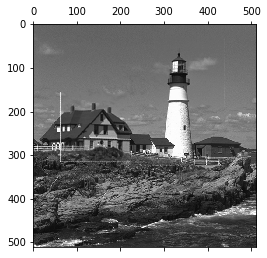

In [417]:
plt.matshow(Fitted_231,cmap='gray')

In [398]:
Final = np.zeros( (512, 512) ) 
for i in range (1,511):
    for j in range (1,511):
        Final[i][j] = int((1/2)*(Fitted_231[i-1][j] + Fitted_231[i][j-1]));

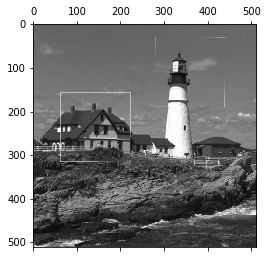

In [298]:
plt.matshow(Final,cmap='gray')